# Fire Up Graphlab Create

(See [Getting Started With SFrames](../../week-1/work/Getting-Started-With-SFrames.ipynb) for setup instructions)

In [1]:
# Ignore and use pandas
# import graphlab

# Use pandas
import pandas as pd
# Use NumPy
import numpy as np

In [2]:
# Limit number of worker processes. This preserves system memory, which prevents hosted notebooks from crashing.
# graphlab.set_runtime_config('GRAPHLAB_DEFAULT_NUM_PYLAMBDA_WORKERS', 4)

# Load Some House Sales Data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [3]:
# sales = graphlab.SFrame('home_data.gl/')

# Read the CSV (Comma Separated Values) data file into DataFrame
sales = pd.read_csv("kc_house_data.csv")

In [4]:
# Take a look at some of the data
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Exploring The Data For Housing Sales 

The house price is correlated with the number of square feet of living space.

In [5]:
# graphlab.canvas.set_target('ipynb')
# sales.show(view="Scatter Plot", x="sqft_living", y="price")

# Create Simple Regression Model For Square Feet Living To Price

Split data into training and testing data set.

We use `seed=0` so that everyone running this notebook gets the same results. In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).

Use the training and testing data set that's already split from <abbr title="Comma Separated Value">CSV</abbr> file.

In [6]:
# Ignore and use training and testing data set from CSV
# train_data,test_data = sales.random_split(.8,seed=0)

# Data type for column when importing CSV
dtype_dict = {
    "bathrooms": float,
    "waterfront": int,
    "sqft_above": int,
    "sqft_living15": float,
    "grade": int,
    "yr_renovated": int,
    "price": float,
    "bedrooms": float,
    "zipcode": str,
    "long": float,
    "sqft_lot15": float,
    "sqft_living": float,
    "floors": str,
    "condition": int,
    "lat": float,
    "date": str,
    "sqft_basement": int,
    "yr_built": int,
    "id": str,
    "sqft_lot": int,
    "view": int
}

# Get the training and testing data set from CSV
# Use `dtype_dict` specify the type of each column
train_data = pd.read_csv("kc_house_train_data.csv", dtype=dtype_dict)
test_data = pd.read_csv("kc_house_test_data.csv", dtype=dtype_dict)

# train_data = pd.read_csv("kc_house_train_data.csv")
# test_data = pd.read_csv("kc_house_test_data.csv")

In [7]:
# Take a look at the training data set
train_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,7936000429,20150326T000000,1007500.0,4.0,3.50,3510.0,7200,2,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050.0,6200.0
17380,2997800021,20150219T000000,475000.0,3.0,2.50,1310.0,1294,2,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330.0,1265.0
17381,0263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
17382,0291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


In [8]:
# Take a look at the testing data set
test_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0114101516,20140528T000000,310000.0,3.0,1.00,1430.0,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780.0,12697.0
1,9297300055,20150124T000000,650000.0,4.0,3.00,2950.0,5000,2,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140.0,4000.0
2,1202000200,20141103T000000,233000.0,3.0,2.00,1710.0,4697,1.5,0,0,...,6,1710,0,1941,0,98002,47.3048,-122.218,1030.0,4705.0
3,8562750320,20141110T000000,580500.0,3.0,2.50,2320.0,3980,2,0,0,...,8,2320,0,2003,0,98027,47.5391,-122.070,2580.0,3980.0
4,7589200193,20141110T000000,535000.0,3.0,1.00,1090.0,3000,1.5,0,0,...,8,1090,0,1929,0,98117,47.6889,-122.375,1570.0,5080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,8672200110,20150317T000000,1088000.0,5.0,3.75,4170.0,8142,2,0,2,...,10,4170,0,2006,0,98056,47.5354,-122.181,3030.0,7980.0
4225,5087900040,20141017T000000,350000.0,4.0,2.75,2500.0,5995,2,0,0,...,8,2500,0,2008,0,98042,47.3749,-122.107,2530.0,5988.0
4226,3448900210,20141014T000000,610685.0,4.0,2.50,2520.0,6023,2,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520.0,6023.0
4227,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0


## Build The Regression Model Using Only `sqft_living` Feature

In [9]:
# Ignore and use scikit learn
# sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'], validation_set=None)

# Use scikit learn Linear Regression
from sklearn.linear_model import LinearRegression

# Reshape `x_train` and `y_train` before fitting the data
# The `reshape` function takes in an unknown number for rows of `-1`
# The `reshape` function takes in the first column for `train_data["sqft_living"]` of `1`
x_train = np.array(train_data["sqft_living"]).reshape(-1, 1)
y_train = np.array(train_data["price"]).reshape(-1, 1)

# Create the linear regression model
sqft_model = LinearRegression()

# Fit a linear regression model using `sqft_living` feature (x) and `price` (y)
sqft_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluate The Simple Model

In [10]:
# print test_data['price'].mean()

# Compute the average price for the test data
print("Average Price For Test Data: {} or ${:,.2f}".format(test_data["price"].mean(), test_data["price"].mean()))

Average Price For Test Data: 543054.0430361788 or $543,054.04


In [11]:
# print sqft_model.evaluate(test_data)

# Use scikit learn metrics
from sklearn import metrics

# Reshape `x_test` and `y_test` for predicting the accuracy of the model
x_test = np.array(test_data["sqft_living"]).reshape(-1, 1)
y_test = np.array(test_data["price"]).reshape(-1, 1)

# Make prediction using the reshape of `test_data["sqft_living"]`
prediction = sqft_model.predict(x_test)

# Calculate the max error (maximum residual error)
sqft_me = metrics.max_error(y_test, prediction)
# Calculate the MSE (Mean Square Error) using the reshape of test_data["price"]
sqft_mse = metrics.mean_squared_error(y_test, prediction)
# Calculate the RMSE (Root Mean Square Error) using the reshape of test_data["price"]
sqft_rmse = np.sqrt(sqft_mse)

In [12]:
# Print the results
print("Linear Regression")
print("Max Error: {}".format(sqft_me))
print("RMSE (Root Mean Square Error): {} or {:,.2f}".format(sqft_rmse, sqft_rmse))

Linear Regression
Max Error: 4143543.155128807
RMSE (Root Mean Square Error): 255191.04978195883 or 255,191.05


>The max error, or maximum residual error over all test houses was `4143543.155128807` (4.1 million). So there was one house that was an outlier, it was really badly predicted.

RMSE of about \$255,170!

# Let's Show What The Predictions Look Like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

`pip install matplotlib`

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

Plot the test data set in two ways. Can plot multiple plots on top of each other.
* x-axis is the suqare feet of living space
* y-axis is for the test data (price)

In addition to plotting the test data, plot the predictions.
* x-axis is going to be the square feet of living space
* y-axis is what the model predicted for each one of those house

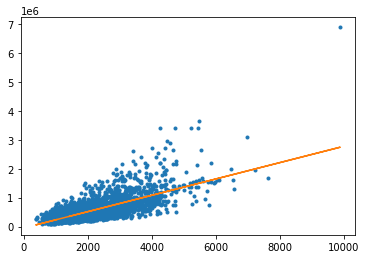

In [14]:
# Plot
# The `predict` function takes `x_test` as an argument
plt.plot(
    test_data["sqft_living"],
    test_data["price"],
    ".",
    test_data["sqft_living"],
    sqft_model.predict(x_test),
    "-"
)

Above: blue dots are original data, green (orange) line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [15]:
#sqft_model.get('coefficients')

# Get the intercept and coefficient
# The variable `.intercept_` and `.coef_` returns ndarray, need to parse to float
# The Intercept is where the line cross the y-axis
# The Coefficient is the square feet
print("Intercept: {} or {:,.2f}".format(sqft_model.intercept_[0], sqft_model.intercept_[0]))
print("Coefficient: {}".format(sqft_model.coef_[0][0]))

Intercept: -47116.07907289383 or -47,116.08
Coefficient: 281.9588396303424


The coefficient of the square feet, if were to interpret in this case, is the price per square feet. How much does a square foot of a house cost? It is ~$280 per square foot.

# Explore Other Features In The Data

To build a more elaborate model, we will explore using more features.

In [16]:
# Create a list of the features going to explore
# Explore other possible features might use
my_features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "zipcode"]

In [17]:
# sales[my_features].show()

In [18]:
# sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

# Build The Regression Model With More Features

In [19]:
#my_features_model = graphlab.linear_regression.create(train_data,target='price',features=my_features,validation_set=None)

# Reshape `x_train` and `y_train` before fitting the data
# The `reshape` function takes in an unknown number for rows of `-1`
# The `reshape` function takes in the columns for `train_data[my_features]` of length `len(my_features)`
my_x_train = np.array(train_data[my_features]).reshape(-1, len(my_features))
my_y_train = np.array(train_data["price"]).reshape(-1, 1)

# Create the linear regression model
my_features_model = LinearRegression()

# Fit a linear regression model using `my_features` features (x) and `price` (y)
my_features_model.fit(my_x_train, my_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Reshape `x_test` and `y_test` for predicting the accuracy of the model
my_x_test = np.array(test_data[my_features]).reshape(-1, len(my_features))
my_y_test = np.array(test_data["price"]).reshape(-1, 1)

# Make prediction using the reshape of `test_data[my_features]`
my_prediction = my_features_model.predict(my_x_test)

# Calculate the max error (maximum residual error)
my_feature_me = metrics.max_error(my_y_test, my_prediction)
# Calculate the MSE (Mean Square Error) using the reshape of test_data["price"]
my_feature_mse = metrics.mean_squared_error(my_y_test, my_prediction)
# Calculate the RMSE (Root Mean Square Error) using the reshape of test_data["price"]
my_feature_rmse = np.sqrt(my_feature_mse)

In [21]:
# Show the features used
print(my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


## Comparing The Results For Simple Model With Adding More Features

In [22]:
# print sqft_model.evaluate(test_data)
# print my_features_model.evaluate(test_data)

# Show Max Error and RMSE (Root Mean Square Error) for Square Foot Model
print("Square Foot Model")
print("Max Error: {}".format(sqft_me))
print("RMSE (Root Mean Square Error): {} or {:,.2f}".format(sqft_rmse, sqft_rmse))
# Show Max Error and RMSE (Root Mean Square Error) for My Feature Model
print("My Feature Model")
print("Max Error: {}".format(my_feature_me))
print("RMSE (Root Mean Square Error): {} or {:,.2f}".format(my_feature_rmse, my_feature_rmse))

Square Foot Model
Max Error: 4143543.155128807
RMSE (Root Mean Square Error): 255191.04978195883 or 255,191.05
My Feature Model
Max Error: 3962290.7930362374
RMSE (Root Mean Square Error): 251491.15746634998 or 251,491.16


The RMSE goes down from 255,170 to 179,508 with more features.

# Apply Learned Models To Predict Prices For 3 Houses

The first house we will use is considered an "average" house in Seattle. 

In [23]:
# Use DateTime
from datetime import datetime

In [24]:
# Select the house
house1 = sales[sales["id"] == 5309101200]

# Parse the "date" field for `house1`
# Use `strptime` to creates a datetime object from a string representing a date and time and a corresponding format string
# Use `timestamp` to convert datetime to float
house1.at[1054, "date"] = datetime.strptime(house1.at[1054, "date"], "%Y%m%dT%H%M%S").timestamp()

In [25]:
# Take a look at `house1` data
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,1.40195e+09,620000.0,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


<img src="./house-5309101200.jpg" />

In [26]:
# The actual price of the house
print(house1["price"])

1054    620000.0
Name: price, dtype: float64


In [27]:
# Reshape `house1` for predicting the accuracy of the model
# Only reshape the particular feature needed for the particular model
# Reshape `sqft_living` feature of `house1` for the `sqft_model`
house1_sqft_model_x_test = np.array(house1["sqft_living"]).reshape(-1, 1)

# Make a prediction
house1_sqft_prediction = sqft_model.predict(house1_sqft_model_x_test)
# Print the result
print("House 1 SQFT Prediction: {} or ${:,.2f}".format(house1_sqft_prediction[0][0], house1_sqft_prediction[0][0]))

House 1 SQFT Prediction: 629585.136039928 or $629,585.14


In [28]:
# Reshape `house1` for predicting the accuracy of the model
# Only reshape the particular feature needed for the particular model
# Reshape `my_features` features of `house1` for the `my_features_model`
house1_my_features_model_x_test = np.array(house1[my_features]).reshape(-1, len(my_features))

# Make a prediction
house1_my_features_prediction = my_features_model.predict(house1_my_features_model_x_test)
# Print the result
print("House 1 My Features Prediction: {} or ${:,.2f}".format(house1_my_features_prediction[0][0], house1_my_features_prediction[0][0]))

House 1 My Features Prediction: 626740.7099692374 or $626,740.71


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

## Prediction For Second, Fancier House

We will now examine the predictions for a fancier house.

In [29]:
# Select the house
house2 = sales[sales["id"] == 1925069082]

# Parse the "date" field for `house2`
# Use `strptime` to creates a datetime object from a string representing a date and time and a corresponding format string
# Use `timestamp` to convert datetime to float
house2.at[1361, "date"] = datetime.strptime(house2.at[1361, "date"], "%Y%m%dT%H%M%S").timestamp()

In [30]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,1.43133e+09,2200000.0,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="./house-1925069082.jpg" />

In [31]:
# Reshape `house2` for predicting the accuracy of the model
# Only reshape the particular feature needed for the particular model
# Reshape `sqft_living` feature of `house2` for the `sqft_model`
house2_sqft_model_x_test = np.array(house2["sqft_living"]).reshape(-1, 1)

# Make a prediction
house2_sqft_prediction = sqft_model.predict(house2_sqft_model_x_test)
# Print the result
print("House 2 SQFT Prediction: {} or ${:,.2f}".format(house2_sqft_prediction[0][0], house2_sqft_prediction[0][0]))

House 2 SQFT Prediction: 1261172.936811895 or $1,261,172.94


In [32]:
# Reshape `house2` for predicting the accuracy of the model
# Only reshape the particular feature needed for the particular model
# Reshape `my_features` features of `house2` for the `my_features_model`
house2_my_features_model_x_test = np.array(house2[my_features]).reshape(-1, len(my_features))

# Make a prediction
house2_my_features_prediction = my_features_model.predict(house2_my_features_model_x_test)
# Print the result
print("House 2 My Features Prediction: {} or ${:,.2f}".format(house2_my_features_prediction[0][0], house2_my_features_prediction[0][0]))

House 2 My Features Prediction: 1263913.7058404908 or $1,263,913.71


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

## Last House, Super Fancy

Our last house is a very large one owned by a famous Seattleite.

In [33]:
bill_gates = {
    "bedrooms": [8], 
    "bathrooms": [25], 
    "sqft_living": [50000], 
    "sqft_lot": [225000],
    "floors": [4], 
    "zipcode": ["98039"], 
    "condition": [10], 
    "grade": [10],
    "waterfront": [1],
    "view": [4],
    "sqft_above": [37500],
    "sqft_basement": [12500],
    "yr_built": [1994],
    "yr_renovated": [2010],
    "lat": [47.627606],
    "long": [-122.242054],
    "sqft_living15": [5000],
    "sqft_lot15": [40000]
}

<img src="./house-bill-gates.jpg" />

In [34]:
# Construct a DataFrame from the dictionary
house_bill_gates = pd.DataFrame.from_dict(bill_gates)

In [35]:
# Reshape `house_bill_gates` for predicting the accuracy of the model
# Only reshape the particular feature needed for the particular model
# Reshape `sqft_living` feature of `house2` for the `sqft_model`
house_bill_gates_sqft_model_x_test = np.array(house_bill_gates["sqft_living"]).reshape(-1, 1)

# Make a prediction
house_bill_gates_sqft_prediction = sqft_model.predict(house_bill_gates_sqft_model_x_test)
# Print the result
print("House Bill Gates SQFT Prediction: {} or ${:,.2f}".format(house_bill_gates_sqft_prediction[0][0], house_bill_gates_sqft_prediction[0][0]))

House Bill Gates SQFT Prediction: 14050825.902444227 or $14,050,825.90


In [36]:
# Reshape `house_bill_gates` for predicting the accuracy of the model
# Only reshape the particular feature needed for the particular model
# Reshape `my_features` features of `house_bill_gates` for the `my_features_model`
house_bill_gates_my_features_model_x_test = np.array(house_bill_gates[my_features]).reshape(-1, len(my_features))

# Make a prediction
house_bill_gates_my_features_prediction = my_features_model.predict(house_bill_gates_my_features_model_x_test)
# Print the result
print("House Bill Gates My Features Prediction: {} or ${:,.2f}".format(house_bill_gates_my_features_prediction[0][0],
                                                                       house_bill_gates_my_features_prediction[0][0]))

House Bill Gates My Features Prediction: 15842208.93346113 or $15,842,208.93


The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)

# Reference

* [Regression using sklearn on KC Housing Dataset](https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4?gi=71e2cbd0db7)
* [House Price Prediction ANN](https://github.com/sagecodes/house-price-prediction-ANN/blob/master/House%20Price%20Prediction%20ANN.ipynb)